In [13]:
from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Dense, Activation, Merge
from keras.optimizers import SGD

%matplotlib notebook
import matplotlib.pyplot as plt

import numpy as np
from numpy.random import normal, random_sample
from numpy.linalg import norm

uniform = lambda a, b, n=1: (b - a) * random_sample((1, n)) + a

<IPython.core.display.Javascript object>


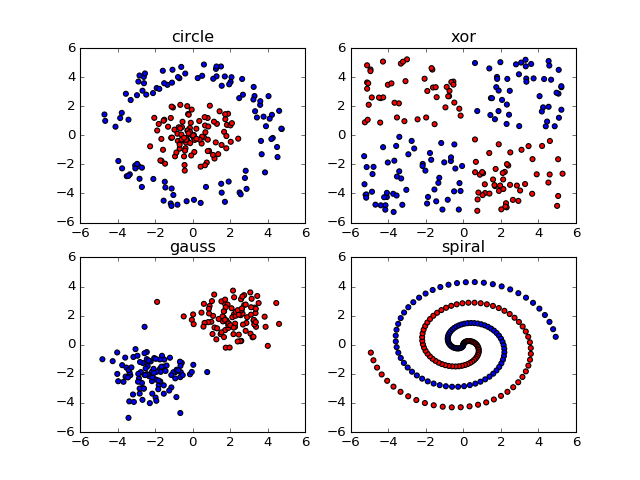

In [14]:
n = 100 # datapoints per category

# circle data
radius = 5
r = np.append(uniform(0, radius*.5, n), uniform(radius*.7, radius, n))
angle = uniform(0, 2*np.pi, n*2)
xy = np.vstack((r * np.sin(angle), r * np.cos(angle)))
t = np.less(norm(xy, axis=0), radius*.5)
circle = (xy.T, t)

# xor data
padding = .3
x = uniform(-5, 5, n*2); x[x>padding] += padding; x[x<padding] -= padding
y = uniform(-5, 5, n*2); y[y>padding] += padding; y[y<padding] -= padding
t = np.less(x*y, 0).flatten()
bxor = (np.vstack((x, y)).T, t)

# gauss data
gauss = (np.vstack((normal(2, 1, (n, 2)), normal(-2, 1, (n, 2)))),
         np.append(np.ones(n), np.zeros(n)))

# spiral data -- requires quite some training with (8, 8, 2)..
def genSpiral(deltaT, n, noise = 0):
    points = np.arange(n)
    r = points / n * 5
    t = 1.75 * points / n * 2 * np.pi + deltaT
    return np.vstack((r * np.sin(t), r * np.cos(t))).T
spiral = (np.vstack((genSpiral(0, n), genSpiral(np.pi, n))),
          np.append(np.ones(n), np.zeros(n)))

# Visualize
fig = plt.figure('Available Datasets')
ax1 = plt.subplot(221); ax1.set_title('circle')
ax1.scatter(*zip(*circle[0]), c=circle[1], cmap='bwr')
ax2 = plt.subplot(222); ax2.set_title('xor')
ax2.scatter(*zip(*xor[0]), c=xor[1], cmap='bwr')
ax3 = plt.subplot(223); ax3.set_title('gauss')
ax3.scatter(*zip(*gauss[0]), c=gauss[1], cmap='bwr')
ax4 = plt.subplot(224); ax4.set_title('spiral')
ax4.scatter(*zip(*spiral[0]), c=spiral[1], cmap='bwr')
fig.canvas.draw()

In [15]:
# Choose dataset here
data, targets = circle # circle, xor, gauss, spiral

model = Sequential([
    Dense(8, input_dim=2),
    Activation('relu'),
    #Dense(8),
    #Activation('relu'),
    Dense(2),
    Activation('relu'),
])

print(model.summary())

sgd = SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model.compile(optimizer=sgd, loss='mean_squared_error', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_9 (Dense)                  (None, 8)             24          dense_input_4[0][0]              
____________________________________________________________________________________________________
activation_9 (Activation)        (None, 8)             0           dense_9[0][0]                    
____________________________________________________________________________________________________
dense_10 (Dense)                 (None, 2)             18          activation_9[0][0]               
____________________________________________________________________________________________________
activation_10 (Activation)       (None, 2)             0           dense_10[0][0]                   
Total params: 42
__________________________________________________________________________

In [12]:
from keras.utils.np_utils import to_categorical

model.fit(data, to_categorical(targets, 2), nb_epoch=5000, verbose=0, shuffle=True, validation_split=0)
predictions = model.predict(data)

fig = plt.figure('Predictions')
plt.scatter(*zip(*data), c=predictions[:,0].round(), cmap='bwr')
fig.canvas.draw()

/usr/lib/python3.5/site-packages/keras/utils/np_utils.py:16: VisibleDeprecationWarning: using a boolean instead of an integer will result in an error in the future
  Y[i, y[i]] = 1.
